<a href="https://colab.research.google.com/github/Emmanuelyeku/Emmanuelyeku/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np

<Figure size 1200x720 with 0 Axes>

<Figure size 1200x720 with 0 Axes>

<Figure size 1200x720 with 0 Axes>

<Figure size 1200x720 with 0 Axes>

In [30]:
players = pd.read_csv("/content/Fifa 23 Players Data.csv")

In [31]:
players.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,...,92,84,92,70,66,70,66,57,66,21


In [32]:
features = ["Overall", "Potential", "Stamina", "Strength", "Dribbling", "LongPassing"]

In [33]:
players = players.dropna(subset = features)

In [34]:
data = players[features].copy()

In [35]:
data.head()

,Overall,Potential,Stamina,Strength,Dribbling,LongPassing
0,91,91,70,68,95,90
1,91,91,82,82,87,76
2,91,91,76,87,85,70
3,91,91,88,74,88,93
4,91,95,87,76,93,71


In [36]:
#scaling the data
data = ((data - data.min())/(data.max() - data.min())) *9 + 1

In [37]:
data.head()

,Overall,Potential,Stamina,Strength,Dribbling,LongPassing
0,10.0,9.234043,7.222222,6.450704,10.000000,9.678571
1,10.0,9.234043,8.555556,8.225352,9.217391,8.178571
2,10.0,9.234043,7.888889,8.859155,9.021739,7.535714
3,10.0,9.234043,9.222222,7.211268,9.315217,10.000000
4,10.0,10.000000,9.111111,7.464789,9.804348,7.642857


In [38]:
data.describe()

,Overall,Potential,Stamina,Strength,Dribbling,LongPassing
count,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,4.856099,5.407447,6.448939,6.089691,6.174878,5.775188
std,1.388527,1.185868,1.807703,1.600070,1.834405,1.567911
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.068182,4.638298,5.666667,5.056338,5.695652,4.857143
50%,4.886364,5.404255,6.777778,6.197183,6.673913,6.035714
75%,5.704545,6.170213,7.666667,7.211268,7.358696,6.892857
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [39]:
#Initializing the random centroids
centroid = data.apply(lambda x: float(x.sample()))

In [40]:
centroid

Overall        4.477273
Potential      4.446809
Stamina        7.555556
Strength       3.281690
Dribbling      7.652174
LongPassing    6.464286
dtype: float64

In [41]:
def random_centroids (data, k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis = 1)

In [42]:
centroids = random_centroids(data, 5)

In [43]:
centroids

,0,1,2,3,4
Overall,5.295455,6.522727,5.704545,5.090909,5.500000
Potential,5.404255,3.489362,3.680851,4.255319,4.255319
Stamina,8.222222,6.222222,2.888889,8.555556,8.888889
Strength,7.718310,4.422535,6.830986,6.197183,6.323944
Dribbling,7.847826,5.597826,8.043478,7.554348,7.260870
LongPassing,6.678571,5.178571,1.857143,7.107143,7.214286


In [44]:
#LAbelling each data point
distances = centroids.apply(lambda x: np.sqrt(((data - x) **2).sum(axis = 1)))

In [45]:
distances

,0,1,2,3,4
0,7.282767,9.478153,11.541836,7.957535,7.836266
1,6.426035,9.332733,11.166144,7.544137,7.315872
2,6.350230,9.210508,10.564351,7.665136,7.461164
3,7.158368,9.946607,12.548627,7.863139,7.610302
4,6.990410,9.790217,11.579097,8.022810,7.826572
...,...,...,...,...,...
18534,10.207079,7.174186,7.621963,9.304983,9.734459
18535,9.636513,6.741418,7.962831,8.691010,9.093904
18536,9.095484,6.844316,8.257862,8.248632,8.694782
18537,10.146641,7.092750,8.396605,9.334874,9.638106


In [46]:
distances.idxmin(axis = 1)

0        0
1        0
2        0
3        0
4        0
        ..
18534    1
18535    1
18536    1
18537    1
18538    1
Length: 18539, dtype: int64

In [47]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x) **2).sum(axis = 1)))
  return distances.idxmin(axis = 1)

In [48]:
labels = get_labels(data, centroids)

In [49]:
labels

0        0
1        0
2        0
3        0
4        0
        ..
18534    1
18535    1
18536    1
18537    1
18538    1
Length: 18539, dtype: int64

In [50]:
labels.value_counts()

0    7249
1    5274
3    4415
2     915
4     686
dtype: int64

In [52]:
data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean()))

,Overall,Potential,Stamina,Strength,Dribbling,LongPassing
0,5.542865,5.928500,7.207327,7.239538,6.810075,6.318471
1,3.711051,4.815345,4.664654,4.597307,4.386898,4.412829
2,3.753195,4.772642,2.510971,6.171284,2.529855,2.593724
3,4.551383,4.911596,7.213228,5.359510,6.931683,6.408731
4,5.778650,5.504416,8.678649,6.038463,6.880721,7.163562


In [53]:
data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

,0,1,2,3,4
Overall,5.542865,3.711051,3.753195,4.551383,5.778650
Potential,5.928500,4.815345,4.772642,4.911596,5.504416
Stamina,7.207327,4.664654,2.510971,7.213228,8.678649
Strength,7.239538,4.597307,6.171284,5.359510,6.038463
Dribbling,6.810075,4.386898,2.529855,6.931683,6.880721
LongPassing,6.318471,4.412829,2.593724,6.408731,7.163562


In [54]:
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [57]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output (wait = True)
  plt.title(f'Iteration{iteration}')
  plt.scatter(x=data_2d [:, 0], y = data_2d[:,1], c = labels)
  plt.scatter(x = centroids_2d[:, 0], y  = centroids_2d[:,1])
  plt.show()

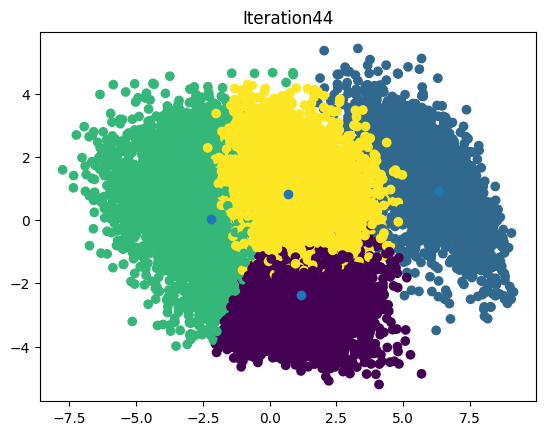

In [60]:
max_iterations = 100
k = 4

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iteration)
  iteration +=1

In [61]:
centroids

,0,1,2,3
Overall,3.484550,4.213564,5.787538,4.195826
Potential,4.901931,4.996701,5.960156,4.676025
Stamina,5.784887,2.558854,7.546507,6.521062
Strength,4.031154,5.174631,6.333608,7.152800
Dribbling,6.559720,1.958474,7.325374,5.609193
LongPassing,5.415971,2.808254,6.855920,5.232389


In [62]:
players[labels ==0]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
1402,Juan Mata,Juan Manuel Mata García,76,76,3500000,"CAM,RM",CAM,Spain,34,170,...,76,75,76,58,59,58,53,47,53,18
1459,Bernard,Bernard Anício Caldeira Duarte,75,75,5500000,LW,LW,Brazil,29,164,...,75,71,75,60,56,60,57,47,57,19
2168,A. Laurienté,Armand Laurienté,74,79,6500000,"RM,RW,ST",CAM,France,23,177,...,75,69,75,59,54,59,56,45,56,21
2242,J. Cazares,Juan Cazares,74,74,4099999,CAM,CAM,Ecuador,30,171,...,74,70,74,56,54,56,53,43,53,18
2482,Josan,José Antonio Ferrández Pomares,73,73,2400000,"RM,RWB",RM,Spain,32,175,...,73,69,73,68,63,68,66,58,66,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18533,Pi Ziyang,Ziyang Pi,47,60,110000,CM,CAM,China PR,19,175,...,50,49,50,47,48,47,47,46,47,18
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,21,174,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,17,175,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,18,170,...,52,49,52,46,44,46,46,42,46,17


In [64]:
players[labels ==0][["Known As"] + features]

,Known As,Overall,Potential,Stamina,Strength,Dribbling,LongPassing
1402,Juan Mata,76,76,50,34,77,74
1459,Bernard,75,75,54,30,81,66
2168,A. Laurienté,74,79,61,33,79,62
2242,J. Cazares,74,74,49,31,75,75
2482,Josan,73,73,65,37,76,62
...,...,...,...,...,...,...,...
18533,Pi Ziyang,47,60,44,47,49,54
18534,D. Collins,47,56,32,31,50,33
18535,Yang Dejiang,47,57,34,35,42,45
18536,L. Mullan,47,67,36,31,52,52


In [65]:
centroids

,0,1,2,3
Overall,3.484550,4.213564,5.787538,4.195826
Potential,4.901931,4.996701,5.960156,4.676025
Stamina,5.784887,2.558854,7.546507,6.521062
Strength,4.031154,5.174631,6.333608,7.152800
Dribbling,6.559720,1.958474,7.325374,5.609193
LongPassing,5.415971,2.808254,6.855920,5.232389


In [66]:
players[labels ==1][["Known As"] + features]

,Known As,Overall,Potential,Stamina,Strength,Dribbling,LongPassing
6,T. Courtois,90,91,38,70,13,35
14,J. Oblak,89,91,41,78,12,40
22,G. Donnarumma,88,92,34,72,28,34
26,K. Navas,88,88,39,75,24,37
33,H. Lloris,87,87,41,43,12,55
...,...,...,...,...,...,...,...
18515,Gao Xiang,48,54,22,56,8,14
18520,N. Deka,48,61,28,42,13,18
18521,V. Yadav,48,62,16,38,9,31
18524,A. Brînzea,48,72,22,50,7,27


In [67]:
players[labels ==2][["Known As"] + features]

,Known As,Overall,Potential,Stamina,Strength,Dribbling,LongPassing
0,L. Messi,91,91,70,68,95,90
1,K. Benzema,91,91,82,82,87,76
2,R. Lewandowski,91,91,76,87,85,70
3,K. De Bruyne,91,91,88,74,88,93
4,K. Mbappé,91,95,87,76,93,71
...,...,...,...,...,...,...,...
15413,F. Tongya,60,70,68,64,59,66
15433,A. Kamara,60,82,55,68,67,66
15448,K. Keïta,60,72,80,65,55,61
15470,C. Gilligan,60,73,73,60,58,60


In [68]:
players[labels ==3][["Known As"] + features]

,Known As,Overall,Potential,Stamina,Strength,Dribbling,LongPassing
217,A. Onana,82,85,38,79,26,53
865,M. Borjan,77,77,40,79,28,48
1196,Aridane,76,76,77,91,40,53
1408,J. Lascelles,75,76,51,84,45,55
1430,O. Colley,75,75,76,88,44,52
...,...,...,...,...,...,...,...
18436,Wen Da,50,61,60,68,48,31
18439,S. Tinubu,50,63,58,63,49,31
18446,D. Yapi,49,72,49,67,36,30
18456,Li Da,49,60,55,67,54,29


In [69]:
from sklearn.cluster import KMeans

In [70]:
kmeans = KMeans(3)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [71]:
centroids = kmeans.cluster_centers_

In [73]:
pd.DataFrame(centroids, columns = features).T

,0,1,2
Overall,5.899132,3.930339,4.476897
Potential,6.031240,4.867393,5.129116
Stamina,7.616445,6.273070,2.764406
Strength,6.728115,5.633468,5.439182
Dribbling,7.233450,6.220562,2.056809
LongPassing,6.856844,5.445877,2.992011
